# Logistische Regression + Regulierung

In [48]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

** Artifical dataset for logistic regression **

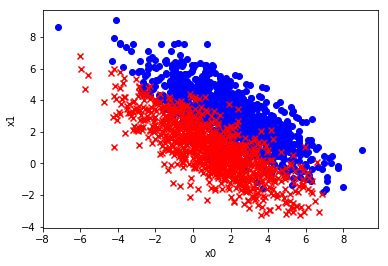

In [49]:
# class 0:
# covariance matrix and mean

cov0 = np.array([[5,-3],[-3,3]])

mean0 = np.array([2.,3])

# number of data points
m0 = 1000
# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)

# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 1000
r1 = np.random.multivariate_normal(mean1, cov1, m1)

plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

X = np.concatenate((r0,r1))
y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1

In [50]:
# Anpassen der Datenstruktur an die Anforderungen des Algorithmus
TRAIN = np.transpose(X)

def feature_scaling(feature):
    return (feature - feature.mean()) / feature.std()

for key, feature in enumerate(TRAIN):
    TRAIN[key] = feature_scaling(TRAIN[key])

** 1) Erstellen Sie eine Pythonfunktion die, die logistische Funktion berechnet. Stellen Sie diese im Bereich [-5, 5] graphisch dar.**

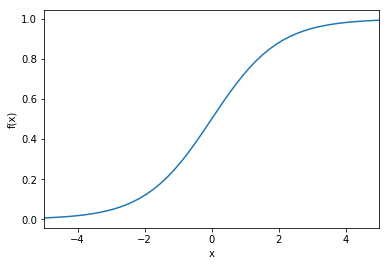

In [51]:
def sigmoid(x):
    return lambda x: 1/(1 + np.exp(-x))

x = np.linspace(-5, 5, 50)
f = sigmoid(x)

# Visualisierung
plt.xlim(-5, 5) 
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, f(x))

**2) Implementieren Sie die Hypothese als Python Funktion **

In [52]:
thetas = np.array([1.1, 2.0, -.9]) 

def logistic_hypothesis(thetas):
    t = thetas[1:]
    return lambda x: 1/(1 + np.exp(np.dot(-x.transpose(),t)))

h = logistic_hypothesis(thetas)

print(h(TRAIN))

[ 0.60594594  0.56929666  0.11264254 ...,  0.65029966  0.99631405
  0.73119244]


** 3) Implementieren Sie den Cross-Entropy-Loss und den Squared-Error-Loss als Python Funktion. Die Pythonfunktion soll dabei eine Funktion zurückgeben **

In [53]:
def cross_entropy_loss(h, X, Y):
    return lambda x: -Y*np.log(h(X)) - (1 - Y)*np.log(1 - h(X))

loss = cross_entropy_loss(h, TRAIN, y)

l = loss(thetas)


** 4) Implementieren Sie die Kostenfunktion J als Python Funktion **

In [54]:
def cost_function(X, Y):
    m = X.shape[1]
    def f(thetas):
        h = logistic_hypothesis(thetas)
        return (-1./m) * (Y*np.log(h(X)) + (1 - Y)*np.log(1 - h(X))).sum()
    
    return f

j = cost_function(TRAIN, y)
print(j(thetas))

1.26604496837


**5) Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der Hypothese**

In [55]:
def compute_new_theta(x, y, thetas, alpha, h):
    m = len(y)
    return thetas - (alpha / m) * (((h - y) * x)).sum()


#alpha = np.linspace(0.01, 0.001, 5)
alpha = np.array([0.1])
iterations = 20000
thetas = np.array([1, 3, 5])
def gradient_descent(alpha, thetas, iterations, x, y):
    costs = np.zeros([len(alpha), iterations])
    for a in range(len(alpha)):
        thetas_sum = np.zeros([iterations])
        for i in range(0, iterations):
            h = logistic_hypothesis(thetas)
            thetas = compute_new_theta(x, y, thetas, alpha[a], h(TRAIN))
            costs[a][i] = j(thetas) 
            thetas_sum[i] = thetas.sum()
    return thetas_sum, costs, thetas

thetas_sum, costs, thetas_opt = gradient_descent(alpha,thetas,iterations, TRAIN, y)



**5) Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.**

**5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte: theta = compute_new_theta(x, y, theta, alpha)**

**5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta. Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten. Kapseln Sie dies in eine Funktion: gradient_descent(alpha, theta, nb_iterations, X, y)**

**5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b**

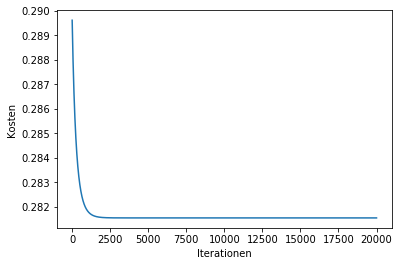

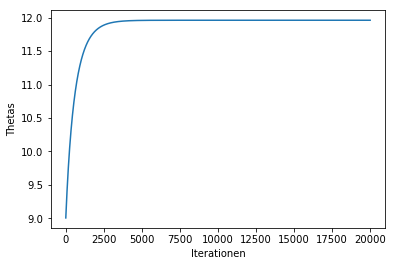

In [56]:
fig = plt.figure()
plt.xlabel('Iterationen')
plt.ylabel('Kosten')

for i, c in enumerate(costs):
    plt.plot(costs[i])
    
fig = plt.figure()
plt.xlabel('Iterationen')
plt.ylabel('Thetas')
plt.plot(thetas_sum)

In [74]:
# 7) Berechnen Sie den Klassifikationsfehler, d.h. der Anteil
# der falsch-klassifizierten Datensätze:
# Klassifikationsfehler = Anzahl der falsch-klassifizierten Datensätze / Anzahl der Datensätze
arr = H(TRAIN)
print(arr)
arr[arr <0.5] = 0
arr[arr >=0.5] = 1
#print(arr)
anzahl = np.sum(arr == y)
#print(anzahl)
prozenten = anzahl/y.size
#print(y.size)
print("'Korrekt' vorhergesagt: ", anzahl, "\n'Prozenten':", prozenten)


[ 0.86603615  0.95374697  0.93673304 ...,  0.01224046  0.00116796
  0.21108957]
[ 1.  1.  1. ...,  0.  0.  0.]
1759
2000


** 6) Stellen Sie die gefundene Hyperebene in einem 3D Plot zusammen mit den Daten dar**

('Best-Fit Thetas: ', array([1, 3, 5]))


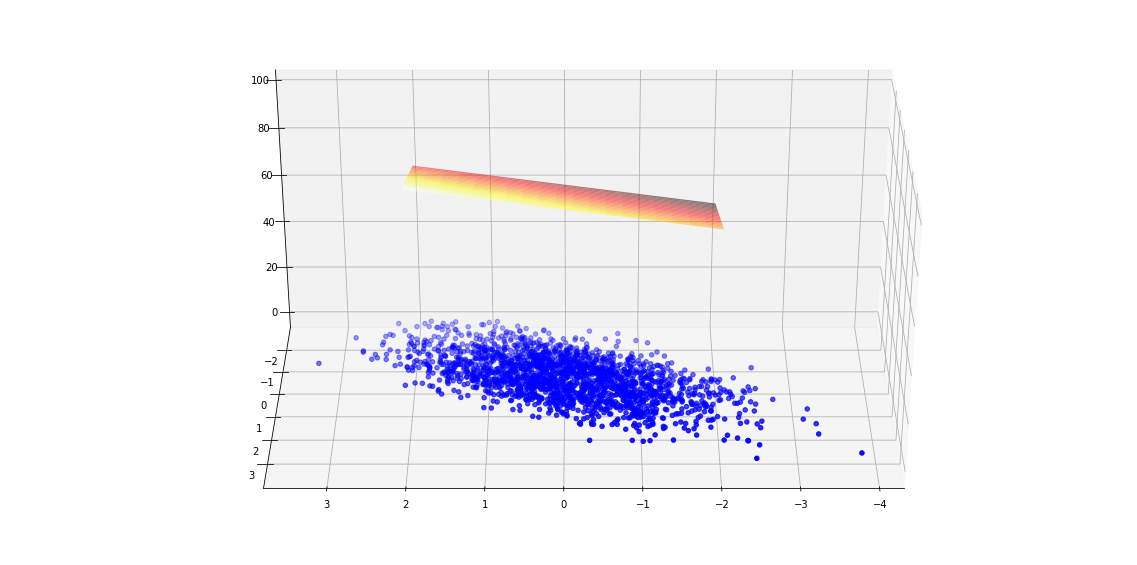

In [58]:
%matplotlib inline
XE = np.ndarray(shape=(2,20))
XE[0] = np.linspace(-2, 2, 20)
XE[1] = np.linspace(-2, 2, 20)

#h_res = linear_hypothesis(thetas)
x0, y0 = np.meshgrid(XE[0], XE[1])
z_res = (thetas_opt[0] + thetas_opt[1]*x0 + thetas_opt[2]*y0) + 75
#z_res = thetas_new[0] + thetas_new[1]*x0 + thetas_new[2]*y0

print("Best-Fit Thetas: ", thetas)

nul, z0 = np.meshgrid(x0, z_res)
fig=plt.figure(figsize=(20, 10))
ax=fig.gca(projection='3d')

ax.view_init(30, 90)

ax.scatter(TRAIN[0], TRAIN[1], y, c="b")
ax.plot_surface(x0, y0, z_res, cmap=cm.hot, alpha=0.5)


In [59]:
# 8) Erweitern Sie die Kostenfunktion um den Regulierungsterm lambda_reg
hyperparam = 0.0001
lambda_reg = hyperparam * np.sum(np.power(thetas[1:], 2))
def cost_function_reg(X, Y):
    m = X.shape[1]
    def f(thetas):
        h = logistic_hypothesis(thetas)
        return (-1./m) * ((Y*np.log(h(X)) + (1 - Y)*np.log(1 - h(X))).sum() + lambda_reg)
    return f

j_reg = cost_function_reg(TRAIN, y)
print(j_reg(thetas))

0.289642960762


In [60]:
# 9) Erweitern Sie den Gradientenabstieg um den Regulierungsterm lambda_reg
def compute_new_theta_reg(x, y, thetas, alpha, h):
    m = len(y)
    return thetas*(1 - alpha*(hyperparam/m)) - (alpha / m) * (((h - y) * x)).sum()

def compute_new_theta2(x, y, thetas, alpha, h):
    m = len(y)
    return thetas - (alpha / m) * np.sum(((h - y) * x))

#alpha = np.linspace(0.01, 0.001, 5)
alpha = np.array([0.1])
iterations = 20000
thetas = np.array([1, 3, 5])
def gradient_descent(alpha, thetas, iterations, x, y):
    costs = np.zeros([len(alpha), iterations])
    for a in range(len(alpha)):
        thetas_sum = np.zeros([iterations])
        for i in range(0, iterations):
            h = logistic_hypothesis(thetas)
            thetas = compute_new_theta(x, y, thetas, alpha[a], h(TRAIN))
            costs[a][i] = j_reg(thetas) 
            thetas_sum[i] = thetas.sum()
    return thetas_sum, costs, thetas

thetas_sum, costs, thetas_opt = gradient_descent(alpha,thetas,iterations, TRAIN, y)

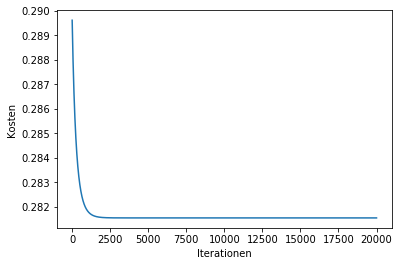

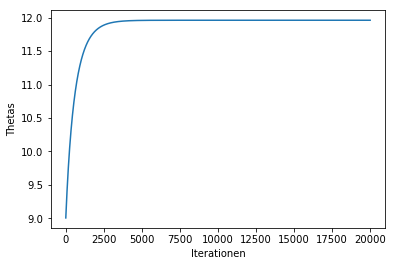

In [61]:
fig = plt.figure()
plt.xlabel('Iterationen')
plt.ylabel('Kosten')

for i, c in enumerate(costs):
    plt.plot(costs[i])
    
fig = plt.figure()
plt.xlabel('Iterationen')
plt.ylabel('Thetas')
plt.plot(thetas_sum)